In [62]:
import torch
from lenet import LeNet
import torchvision
import torchvision.datasets as datasets
from interpretation_attacks import SimpleGradientsAttack
import matplotlib.pyplot as plt

In [63]:
net = LeNet()

epsilon = 0
alpha_wd = 0
alpha_jr = 0
training_round = 1

net.load_state_dict(torch.load(f'models/ep{epsilon}_wd{alpha_wd}_jr{alpha_jr}', map_location=torch.device('cpu')))
net.eval()

data_preprocess = torchvision.transforms.Compose([
                torchvision.transforms.ToTensor(), 
                torchvision.transforms.Normalize((0.1307,), (0.3081,))])
train_loader = torch.utils.data.DataLoader(
                datasets.MNIST(root='./data', train=True, transform=data_preprocess), 
                batch_size=1, shuffle=True)

	lenet(sample) = 3


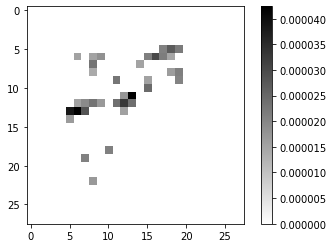

In [67]:
sample,label = next(iter(train_loader))

sga = SimpleGradientsAttack(net, sample, label)
saliency_map = sga.saliency_map()
mean = torch.mean(saliency_map)
std = torch.std(saliency_map)
saliency_map = torch.where(saliency_map > mean+1.5*std, saliency_map, torch.tensor(0.))

print(f'\tlenet(sample) = {sga.predict(vector=False)}')
plt.imshow(saliency_map, cmap='binary')
plt.colorbar()
plt.show()